In [2]:
#Import python libraries into IPython notebook
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

#Import Boston data set into variable called boston
from sklearn.datasets import load_boston
boston = load_boston()

#Object boston is a dictionary,check the keys associated with it 
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [3]:
#Check number of rows/instances and columns/attributes
boston.data.shape

(506, 13)

In [4]:
#Print feature names of boston data set
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
#Check description of the boston data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
#Convert boston data set into a pandas dataframe
bos = pd.DataFrame(boston.data)
#Display the top 5 rows to see the data in dataframe
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
#Replace the number columns with feature names
bos.columns = boston.feature_names
#Check if columns are replaced with feature names instead of numbers
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
#target contains housing prices. Display the 1st five housing #Addprices
boston.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [14]:
#Add housing prices in bos dataframe
bos['PRICE']=boston.target

In [15]:
#Verify if the PRICE column is present or not
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
# Fit a linear regression model and predict the housing prices
#Y = boston housing price(also called “target” data in Python)
#X = all the other features (or independent variables)

from sklearn.linear_model import LinearRegression

# drop the PRICE column as the parameters are only needed as X values
X = bos.drop('PRICE', axis=1)
lm = LinearRegression()
lm


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
print('Estimated Intercept=', lm.intercept_)

Estimated Intercept 36.49110328035971


In [23]:
print('No of co-efficients=',len(lm.coef_))

No of co-efficients= 13


In [32]:
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['features','estimatedCoefficients'])

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


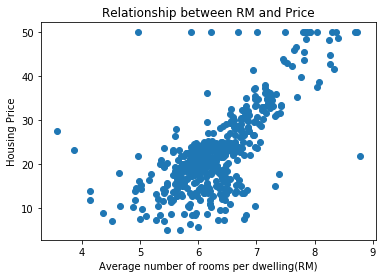

In [33]:
#Since there is a high co-relation between RM and housing prices
#Plot a scatter plot between True RM and True housing prices
plt.scatter(bos.RM,bos.PRICE)
plt.xlabel("Average number of rooms per dwelling(RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
plt.show()

In [34]:
#Predict prices and display 1st five housing prices
lm.predict(X)[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

Text(0.5,1,'Prices vs Predicted Prices: $Y_i$ vs $\\hat{Y}_i$')

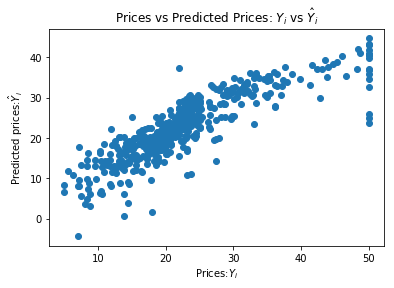

In [35]:
#Plot a scatter plot to comapre true prices and predicted prices
plt.scatter(bos.PRICE,lm.predict(X))
plt.xlabel("Prices:$Y_i$")
plt.ylabel("Predicted prices:$\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")

In [36]:
#As noticed in scatter plot there is some error in prediction as the housing prices increase
#Let's calculate the mean squared error
mseFull = np.mean((bos.PRICE - lm.predict(X))**2)
print(mseFull)

21.897779217687496


In [37]:
#If we fit linear regression for one feature the error will be very high
#Let's take the feature PTRATIO and calculate the mean squared error

lm = LinearRegression()
lm.fit(X[['PTRATIO']],bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
msePTRATIO = np.mean((bos.PRICE-lm.predict(X[['PTRATIO']]))**2)
print(msePTRATIO)

62.65220001376924


#The mean squared error has increased. So this shows that a single feature is not a good predictor of housing prices

#Divide your data sets randomly into train and test sets using train_test_split function of scikit 

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,bos.PRICE, test_size=0.33, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [42]:
#Build linear regression using train test data
lm = LinearRegression()
lm.fit(X_train,Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [49]:
print("Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train- lm.predict(X_train)) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, Y_test:",np.mean((Y_test - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 19.546758473534663
Fit a model X_train, and calculate MSE with X_test, Y_test: 28.541367275618573


Text(0,0.5,'Residuals')

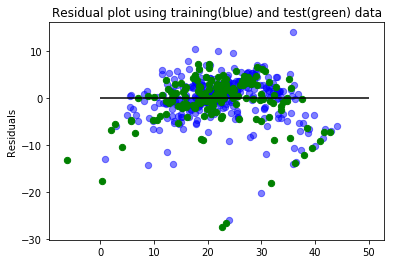

In [50]:
#Plot a residual plot for train and test data
plt.scatter(lm.predict(X_train),lm.predict(X_train)-Y_train,c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test)-Y_test, c='g', s=40)
plt.hlines(y=0, xmin=0, xmax = 50)
plt.title('Residual plot using training(blue) and test(green) data')
plt.ylabel('Residuals')